In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# Aim is to predict the marks of students of the test data

In [9]:
# Downloading the data from github
!wget https://github.com/wncc/Machine-Learning-LS-24/raw/main/Week%201/Assignment/%20Linear%20Regression%20Assignment/Test%20data.xlsx --quiet
!wget https://github.com/wncc/Machine-Learning-LS-24/raw/main/Week%201/Assignment/%20Linear%20Regression%20Assignment/Training%20data.xlsx --quiet

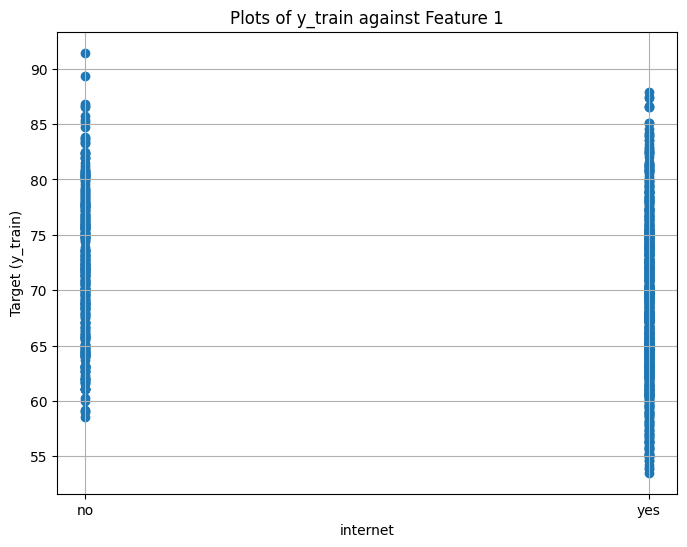

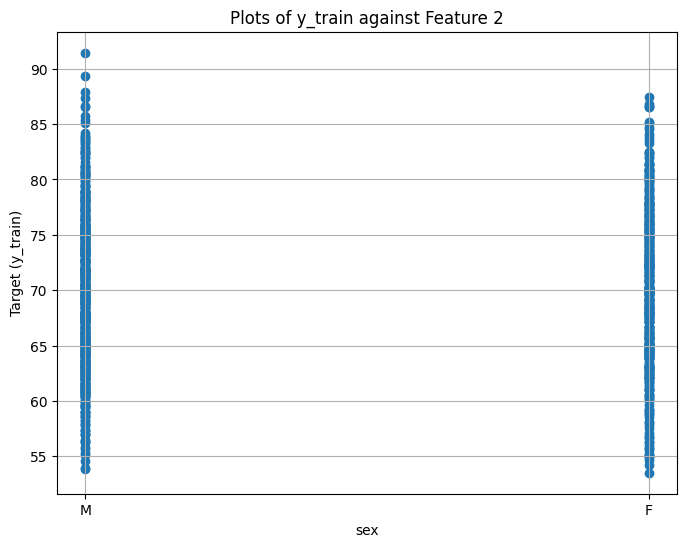

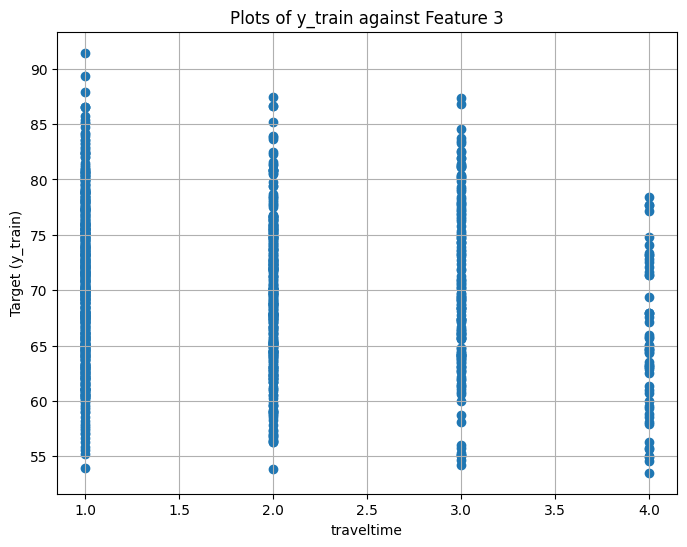

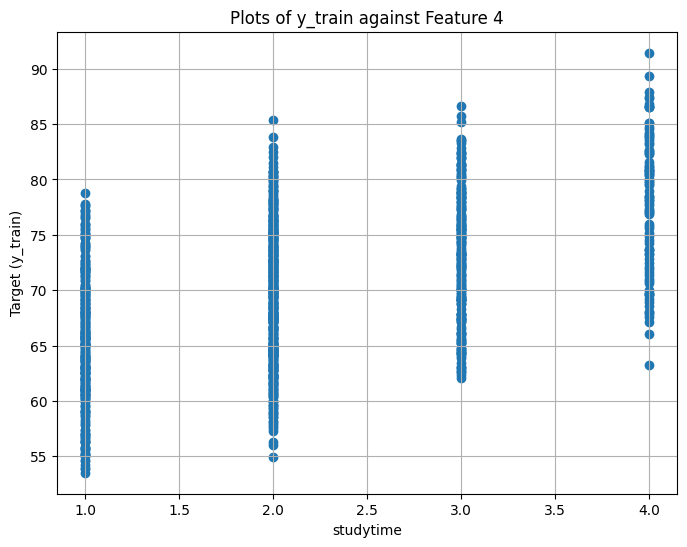

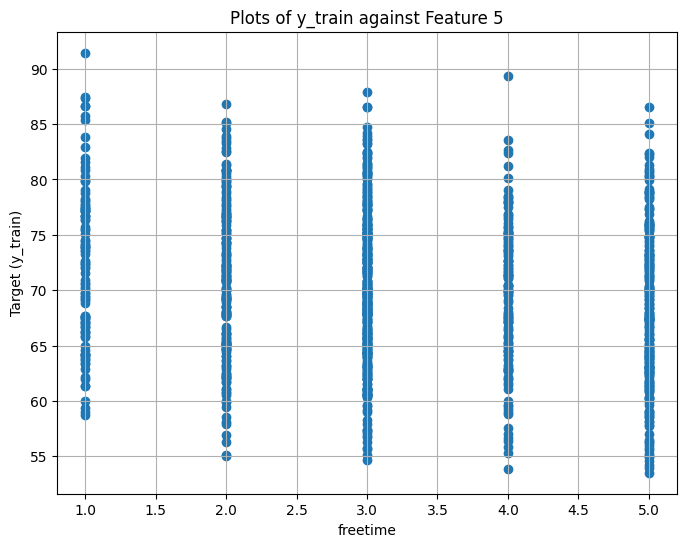

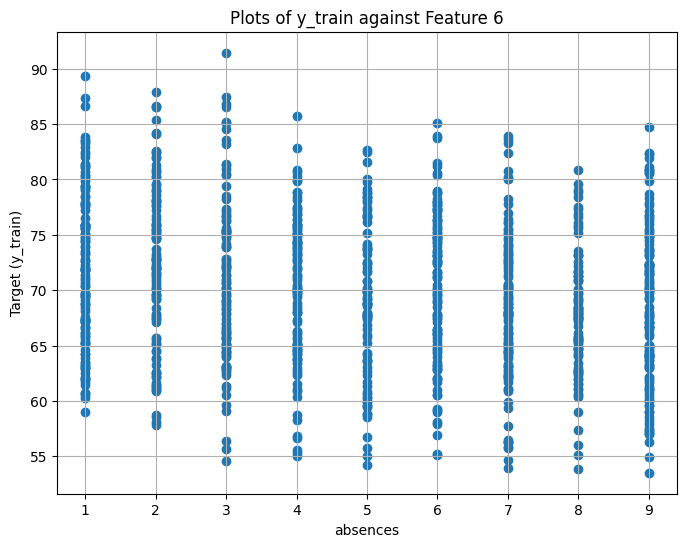

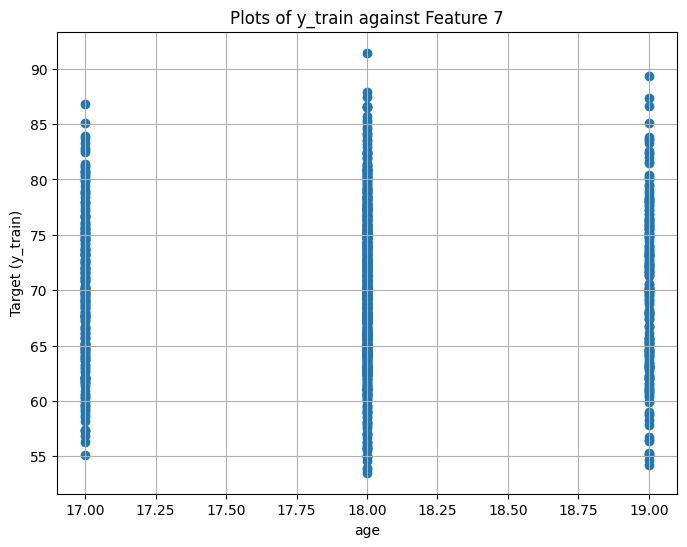

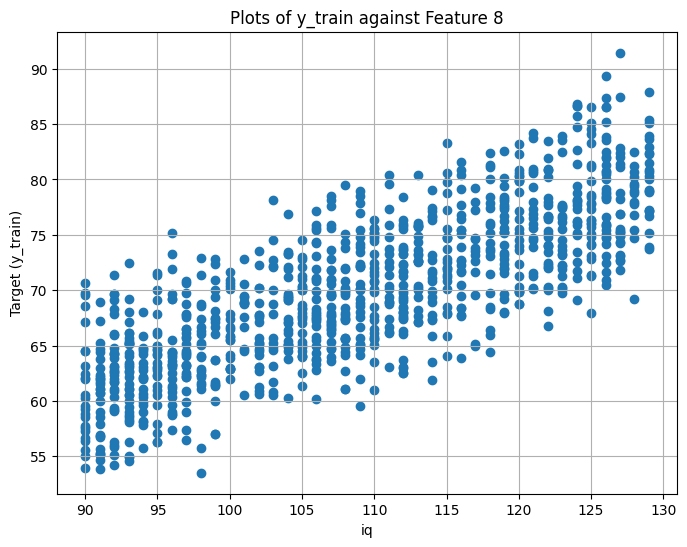

In [10]:
# Use the file namd 'training data' to train the model

data = pd.read_excel('Training data.xlsx')
x_train = np.array(data.iloc[:,0:8])
y_train = np.array(data.iloc[:,8]).reshape(-1,1)

# Try plotting y_train with different features
# To get an idea whether to add some features or not
# Add some features if required in x_train
for i in range(x_train.shape[1]):
  feature_name = data.columns[i]
  plt.figure(figsize=(8, 6))
  plt.scatter(x_train[:, i], y_train)
  plt.xlabel(feature_name)
  plt.ylabel("Target (y_train)")
  plt.title(f"Plots of y_train against Feature {i+1}")
  plt.grid(True)
  plt.show()


# Also do label encoding for features not represented in numbers
# refer the link if not know : https://youtu.be/589nCGeWG1w?si=t2Wa7LgbUOO4RooM

def feature_changing(x_train):
  # ---------
  label_encoder = LabelEncoder()
  x_train[:, 0] = label_encoder.fit_transform(x_train[:, 0])
  x_train[:, 1] = label_encoder.fit_transform(x_train[:, 1])
  # ---------
  return x_train

x_train = feature_changing(x_train)

In [11]:
def z_score(x_train):

  # ---------
    # write the code for feature scaling here
    x_mean = np.mean(x_train)
    x_std = np.std(x_train)
    x_train = (x_train - x_mean)/x_std
  # ---------

    return x_train,x_std,x_mean

In [12]:
def cost(x_train,y_train,w,b):

  # ---------
    m = x_train.shape[0]
    y_pred = np.dot(x_train,w) + b
    loss = np.sum((y_train - y_pred)**2)/(2*m)
  # ---------

    return loss

In [13]:
def gradient_descent(x_train,y_train,w,b):

  # ---------
    m = x_train.shape[0]
    costs = []
    iter = 1000
    learning_rate = 0.01
    for i in range(iter):
        y_pred = np.dot(x_train, w) + b

        dw = (1/m) * np.dot(x_train.T, (y_pred - y_train))
        db = (1/m) * np.sum(y_pred - y_train)

        w -= learning_rate * dw
        b -= learning_rate * db
      # ---------

    return w,b

In [14]:
x_train = x_train.astype(np.float64)
x_train,x_std,x_mean = z_score(x_train)

np.random.seed(2147483647)
w = np.random.randn(x_train.shape[1],1)
b = np.random.randn(1)

old_cost = 0

while abs(old_cost - cost(x_train,y_train,w,b))>0.00001:
  old_cost = cost(x_train,y_train,w,b)
  w,b = gradient_descent(x_train,y_train,w,b)

x_predict = pd.read_excel('Test data.xlsx').iloc[:,:8].to_numpy()
x_predict = feature_changing(x_predict)
x_predict = (x_predict - x_mean)/x_std
ans = pd.read_excel('Test data.xlsx').iloc[:,8].to_numpy()

y_predict = np.dot(x_predict,w) + b

accuracy = 0
for dim in range(len(ans)):
  if abs(y_predict[dim]-ans[dim])<0.5: # do not change the tolerance as you'll be checked on +- 0.5 error only
    accuracy += 1
accuracy = round(accuracy*100/200.0,2)
ok = 'Congratulations' if accuracy>95 else 'Optimization required'
print(f"{ok}, your accuracy is {accuracy}%")

Congratulations, your accuracy is 100.0%
